# Housekeeping

# Setup Code

In [1]:
# Import Packages
import Pkg

Pkg.add("Plots")
Pkg.add("LsqFit")
Pkg.add("DelimitedFiles")
Pkg.add("PlotlyJS")  # optional if you later want interactive plots
Pkg.add("LaTeXStrings")

   Resolving package versions...
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Project.toml`
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Project.toml`
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Project.toml`
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Project.toml`
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Project.toml`
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Manifest.toml`


In [2]:
using Plots,DelimitedFiles,LsqFit,LaTeXStrings

include("../src/PhotoPeakFit.jl");

default(framestyle=:box,
        mc=:black,
        grid=false,
        guidefont=14,
        tickfont=12,
        lc=:navy,
        xlabel="Eᵧ (internal)",
        ylabel="counts")

In [3]:
kliterature = [564.79,
               586.01,
               2013.45]

3-element Vector{Float64}:
  564.79
  586.01
 2013.45

## Import Eu152 Efficiency Calibration Data

Using new csv i created

In [4]:
# Fit function is of the form 50^(p[1]+p[2]*log10(e)+p[3]*log10(e)^2)
io = open("../calibrations/Eu152-efficiency-cal_debug.csv", "r")
clover_eff_params = readdlm(io, ',', Float64, '\n', comments=true, comment_char='#')
close(io)

c0_eff_fit, c1_eff_fit, c2_eff_fit = clover_eff_params[1,:],clover_eff_params[2,:],clover_eff_params[3,:]

c0_eff_params,c1_eff_params,c2_eff_params = [c0_eff_fit[1],c0_eff_fit[3],c0_eff_fit[5]],
                                            [c1_eff_fit[1],c1_eff_fit[3],c1_eff_fit[5]],
                                            [c2_eff_fit[1],c2_eff_fit[3],c2_eff_fit[5]]

c0_σeff,c1_σeff,c2_σeff = [c0_eff_fit[2],c0_eff_fit[4],c0_eff_fit[6]], 
                          [c1_eff_fit[2],c1_eff_fit[4],c1_eff_fit[6]],
                          [c2_eff_fit[2],c2_eff_fit[4],c2_eff_fit[6]]

([0.04994475356378319, 0.03881764706440051, 0.0074349631904078745], [0.058397370815562344, 0.04589348487849286, 0.008923473979328399], [0.046981088183109074, 0.03611056774624827, 0.006851762049610171])

# Clover 0 ($N_{180}$)

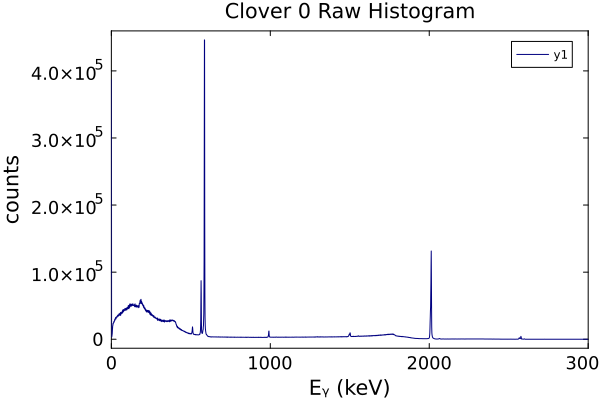

In [5]:
kc0 = readdlm("rough_data/K47_T1_001_beta0_clover.txt",',')

# Plot uncalibrated histogram
plot(kc0[:,1],kc0[:,2],xlims=(0,3000),xlabel="Eᵧ (keV)", title="Clover 0 Raw Histogram")

## Peak 1 (565)

P1 = -7858.463731971117(54470.80284300188)
P2 = 30.75498403994166(96.61694462101438)
P3 = 234754.05466880187(7644.110959273304)
P4 = 564.5450020268174(0.03799336624606249)
P5 = 1.2198627805924207(0.04055081614042666)
Calibrated - Expected = -0.24499797318253513 keV


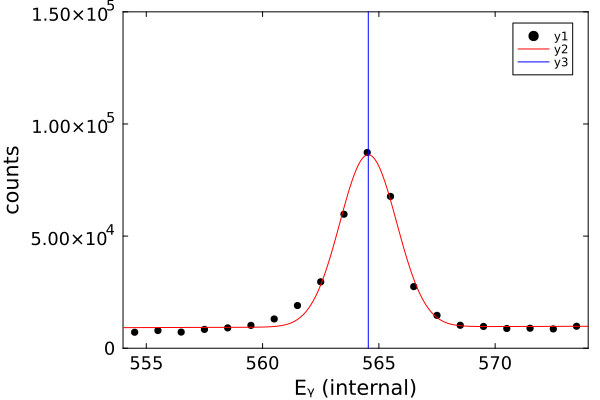

In [6]:
c0_p1_mean = 564
c0_x1low,c0_x1high=c0_p1_mean-10,c0_p1_mean+10; ylow,yhigh=0,1.5e5
c0_param1=[100,0.05,2e5,c0_p1_mean,1.0]

c0_p1,c0_s1,f=PhotopeakFit.gaussianfit(kc0,c0_x1low,c0_x1high,c0_param1)

for (i,val) in enumerate(c0_p1)
    println("P$i = ",val,"($(c0_s1[i]))")
end
println("Calibrated - Expected = $(c0_p1[4] - kliterature[1]) keV")

scatter(kc0[:,1],kc0[:,2],xlims=(c0_x1low,c0_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0_p1),c0_x1low,c0_x1high,lc=:red)
vline!([c0_p1[4]],lc=:blue)

## Peak 2 (586)

P1 = 448973.7629468975(54470.80284300188)
P2 = -730.9117287357619(96.61694462101438)
P3 = 1.4468822018452063e6(7644.110959273304)
P4 = 585.8180717821072(0.03799336624606249)
P5 = 1.2641810650050938(0.04055081614042666)
Calibrated - Expected = -0.19192821789283698 keV


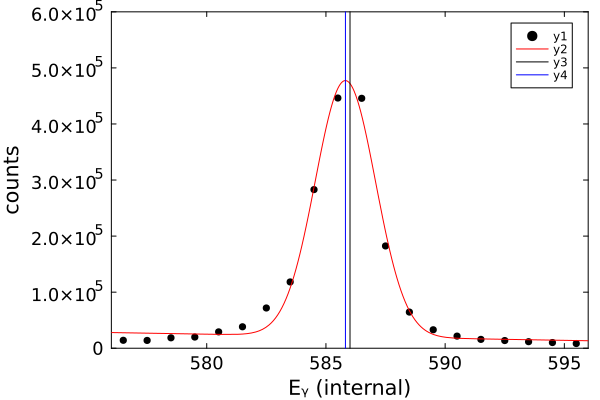

In [7]:
c0_p2_mean = 586
c0_x1low,c0_x1high=c0_p2_mean-10,c0_p2_mean+10; ylow,yhigh=0,6e5
c0_param1=[100,0.05,2e5,c0_p2_mean,1.0]

c0_p2,c0_s2,f=PhotopeakFit.gaussianfit(kc0,c0_x1low,c0_x1high,c0_param1)

for (i,val) in enumerate(c0_p2)
    println("P$i = ",val,"($(c0_s1[i]))")
end
println("Calibrated - Expected = $(c0_p2[4] - kliterature[2]) keV")

scatter(kc0[:,1],kc0[:,2],xlims=(c0_x1low,c0_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0_p2),c0_x1low,c0_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c0_p2[4]],lc=:blue)

## Peak 3 (2013)
this one looks ugly

P1 = 2.640489703651069e6(54470.80284300188)
P2 = -1305.6084501088187(96.61694462101438)
P3 = 521980.67794699373(7644.110959273304)
P4 = 2012.0061736541636(0.03799336624606249)
P5 = 1.9194679269216113(0.04055081614042666)
Calibrated - Expected = -1.4438263458364418 keV


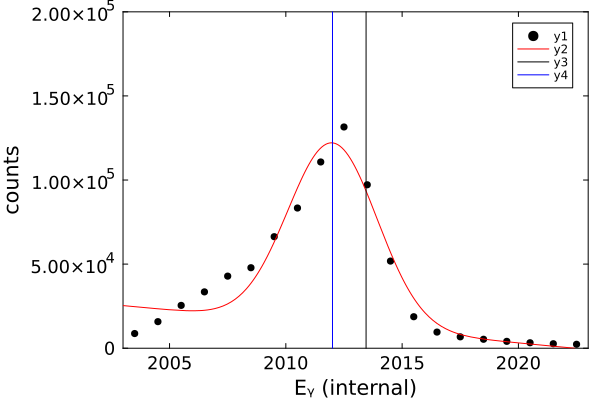

In [8]:
c0_p3_mean = 2013
c0_x1low,c0_x1high=c0_p3_mean-10,c0_p3_mean+10; ylow,yhigh=0,2e5
c0_param1=[100,0.05,2e5,c0_p3_mean,1.0]

c0_p3,c0_s3,f=PhotopeakFit.gaussianfit(kc0,c0_x1low,c0_x1high,c0_param1)

for (i,val) in enumerate(c0_p3)
    println("P$i = ",val,"($(c0_s1[i]))")
end
println("Calibrated - Expected = $(c0_p3[4] - kliterature[3]) keV")

scatter(kc0[:,1],kc0[:,2],xlims=(c0_x1low,c0_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0_p3),c0_x1low,c0_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c0_p3[4]],lc=:blue)

## Areas

In [51]:
c0_areas = [c0_p1[3], 
            c0_p2[3], 
            c0_p3[3]]

c0_σareas = [c0_s1[3],
             c0_s2[3],
             c0_s3[3]] 

3-element Vector{Float64}:
  7644.110959273304
 51670.30342707934
 45203.07098346943

# Clover 1 ($N_{0}$)

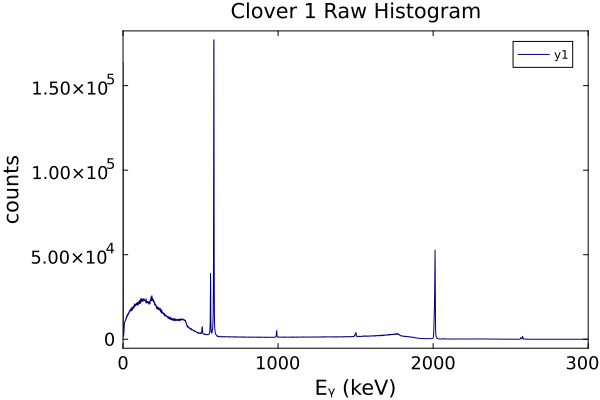

In [10]:
kc1 = readdlm("rough_data/K47_T1_001_beta1_clover.txt",',')

# Plot uncalibrated histogram
plot(kc1[:,1],kc1[:,2],xlims=(0,3000),xlabel="Eᵧ (keV)", title="Clover 1 Raw Histogram")

## Peak 1 (565)

P1 = -1406.5124060195042(24588.078891362413)
P2 = 9.690963515595518(43.612756253301185)
P3 = 104506.17966448322(3434.2615334502216)
P4 = 564.5485465973056(0.0381421048485023)
P5 = 1.2117768124431334(0.04068882387911266)
Calibrated - Expected = -0.2414534026943329 keV


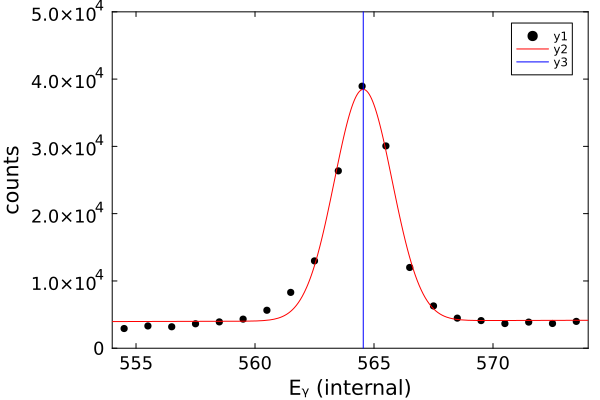

In [11]:
c1_p1_mean = 564
c1_x1low,c1_x1high=c1_p1_mean-10,c1_p1_mean+10; ylow,yhigh=0,5e4
c1_param1=[100,0.05,2e5,c1_p1_mean,1.0]

c1_p1,c1_s1,f=PhotopeakFit.gaussianfit(kc1,c1_x1low,c1_x1high,c1_param1)

for (i,val) in enumerate(c1_p1)
    println("P$i = ",val,"($(c1_s1[i]))")
end
println("Calibrated - Expected = $(c1_p1[4] - kliterature[1]) keV")

scatter(kc1[:,1],kc1[:,2],xlims=(c1_x1low,c1_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c1_p1),c1_x1low,c1_x1high,lc=:red)
vline!([c1_p1[4]],lc=:blue)

## Peak 2 (586)

P1 = 181171.33923682536(24588.078891362413)
P2 = -294.8892379293058(43.612756253301185)
P3 = 573703.0837949677(3434.2615334502216)
P4 = 585.8197540509084(0.0381421048485023)
P5 = 1.26394533207921(0.04068882387911266)
Calibrated - Expected = -0.19024594909160442 keV


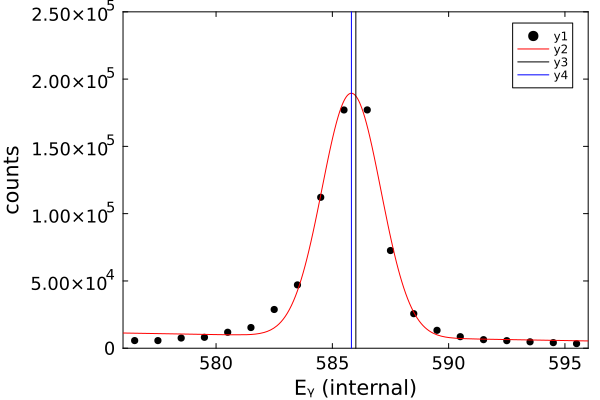

In [12]:
c1_p2_mean = 586
c1_x1low,c1_x1high=c1_p2_mean-10,c1_p2_mean+10; ylow,yhigh=0,2.5e5
c1_param1=[100,0.05,2e5,c1_p2_mean,1.0]

c1_p2,c1_s2,f=PhotopeakFit.gaussianfit(kc1,c1_x1low,c1_x1high,c1_param1)

for (i,val) in enumerate(c1_p2)
    println("P$i = ",val,"($(c1_s1[i]))")
end
println("Calibrated - Expected = $(c1_p2[4] - kliterature[2]) keV")

scatter(kc1[:,1],kc1[:,2],xlims=(c1_x1low,c1_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c1_p2),c1_x1low,c1_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c1_p2[4]],lc=:blue)

## Peak 3 (2013)

P1 = 1.3614388660207966e6(24588.078891362413)
P2 = -673.1943593165624(43.612756253301185)
P3 = 193029.96191512953(3434.2615334502216)
P4 = 2012.0728902795788(0.0381421048485023)
P5 = 1.791961285322395(0.04068882387911266)
Calibrated - Expected = -1.377109720421231 keV


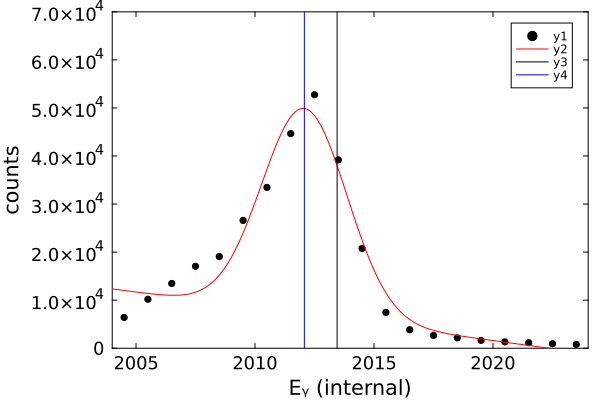

In [13]:
c1_p3_mean = 2014
c1_x1low,c1_x1high=c1_p3_mean-10,c1_p3_mean+10; ylow,yhigh=0,7e4
c1_param1=[100,0.05,2e5,c1_p3_mean,1.0]

c1_p3,c1_s3,f=PhotopeakFit.gaussianfit(kc1,c1_x1low,c1_x1high,c1_param1)

for (i,val) in enumerate(c1_p3)
    println("P$i = ",val,"($(c1_s1[i]))")
end
println("Calibrated - Expected = $(c1_p3[4] - kliterature[3]) keV")

scatter(kc1[:,1],kc1[:,2],xlims=(c1_x1low,c1_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c1_p3),c1_x1low,c1_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c1_p3[4]],lc=:blue)

## Areas

In [50]:
c1_areas = [c1_p1[3], 
            c1_p2[3], 
            c1_p3[3]]

c1_σareas = [c1_s1[3],
            c1_s2[3],
           c1_s3[3]] 

3-element Vector{Float64}:
  3434.2615334502216
 20662.584831732936
 15107.247537941854

# Asymmetry Calcs
not efficiency corrected right now (I don't knwo if they need to be because this is experimental data)

## Calculation Schematics

Spin of 47K is 1/2+ (from BNL)

A = -1 is invalid, ($I_f$ can't be negative)

$I_f = 1/2 ^+$ corresponds to 586KeV peak in 47K

$I_f = 3/2 ^+$ corresponds to 565KeV peak in 47K


<img src="A_val_eq.png" alt="Drawing" style="width: 300px;"/>


This gives us A = -2/3 for the 586KeV peak and A = +1/3 for the 565KeV peak which can be plugged into the following equation to solve for the polarization.


<img src="P_raw_eq.png" alt="Drawing" style="width: 300px;"/>


$(N_0^+ / N_{180}^+)_{2.244}$ corresponds to $(N_0^+ / N_{180}^+)_{565}$ and $(N_0^+ / N_{180}^+)_{0.673}$ corresponds to $(N_0^+ / N_{180}^+)_{586}$

Solving for P gives:


c1_areas corresponds to $N_0$ and c_0 areas corresponds to $N_{180}$

clover 1 is N_0 and clover zero is N_180

This kind of gets confusing so make sure to keep track

In [52]:
ratio = c1_areas ./ c0_areas
println(ratio)

err_rat = (((c1_σareas .^ 2) .* ((1 ./ c0_areas) .^ 2)) .+ ((c0_σareas .^ 2) .* ((-c1_areas ./ (c0_areas .^2)) .^ 2))) .^ (0.5)
println(err_rat)

[0.4451730548889718, 0.3965098769363015, 0.36980288748299495]
[0.020594706709120652, 0.020110806877343297, 0.04316507855827325]


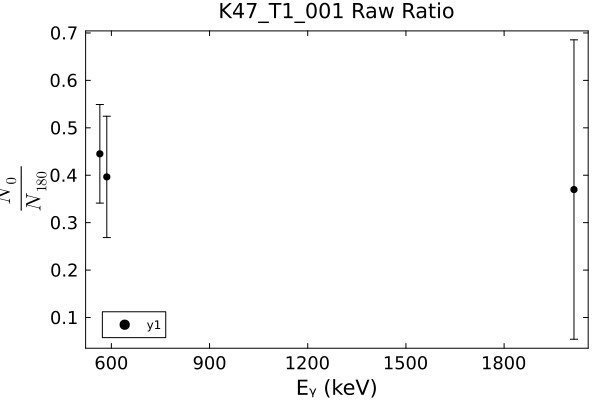

In [49]:
q = scatter(kliterature, ratio, yerr=err_rat,
    xlabel = "Eᵧ (keV)",
    ylabel = L"\frac{N_0}{N_{180}}",
    title = "K47_T1_001 Raw Ratio"
)

# Polarization Calculation

In [53]:
N_565 = ratio[1]
println(N_565)
N_σ565 = err_rat[1]
println(N_σ565)

N_586 = ratio[2]
println(N_586)
N_σ586 = err_rat[2]
println(N_σ586)

0.4451730548889718
0.020594706709120652
0.3965098769363015
0.020110806877343297


ugly equation time

In [56]:
P_plus = ((9 .* (N_565 .+ N_586)) .+ (3 .* (((N_565 .^ 2) .+ (34 .* N_565 .* N_586) .+ (N_586 .^ 2)) .^ 0.5))) ./ (4 .* (N_565 .- N_586))
println(P_plus)

P_plus = ((9 .* (N_565 .+ N_586)) .- (3 .* (((N_565 .^ 2) .+ (34 .* N_565 .* N_586) .+ (N_586 .^ 2)) .^ 0.5))) ./ (4 .* (N_565 .- N_586))
println(P_plus)

err_P =  P_plus .* (((N_σ565 .^2) ./ N_565) .+ ((N_σ586 .^2) ./ N_586)) .^ 0.5

Percent = (err_P ./ P_plus) .* 100

77.77456639188051
0.057859531833656414


4.441586141432754